<a href="https://colab.research.google.com/github/rcarvajal208/MachineLearning_Retos/blob/master/Reto5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Se importan las librerias a utilizar y el archivo que contiene los datos a evaluar


In [1]:
from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import random
files.upload()

{}

Se descargan los datos suministrados

In [2]:
musica = pd.DataFrame(pd.read_excel('Reto1_Revisado_Musica.xlsx')).drop(['genre','track_id','title','artist_name'],axis=1)
print(musica.describe())

              type    loudness  ...  var_timbre11  var_timbre12
count  8350.000000  8350.00000  ...   8350.000000   8350.000000
mean      0.519042   -12.71443  ...    350.331967    372.121087
std       0.499667     5.80163  ...    170.406693    181.784508
min       0.000000   -41.03800  ...     49.275323     34.917502
25%       0.000000   -15.90100  ...    230.339339    267.177197
50%       1.000000   -11.70950  ...    317.891281    334.593569
75%       1.000000    -8.39900  ...    435.597608    426.006784
max       1.000000    -0.27800  ...   2049.996543   2417.601217

[8 rows x 31 columns]


A continuación se hace el preprocesamiento de los datos. Para lo cual normalizamos los datos

In [0]:
#x_multiple = preprocessing.normalize(np.array(musica.drop('type',1)))
scaler = preprocessing.StandardScaler()
x_train = np.array(musica.drop('type',1))
scaler.fit(x_train)
x_multiple = scaler.transform(x_train)
y_multiple = np.array(musica['type'])
porcentajePrueba1 = 0.9
porcentajePrueba2 = 0.5
porcentajePrueba3 = 0.2
porcentajePrueba4 = 0.1
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = model_selection.train_test_split(x_multiple,y_multiple,test_size=1-porcentajePrueba1)
x_entrenamiento, x_validacion, y_entrenamiento, y_validacion = model_selection.train_test_split(x_entrenamiento,y_entrenamiento,test_size=1-porcentajePrueba1)
x_entrenamiento2, x_sobrante2, y_entrenamiento2, y_sobrante2 = model_selection.train_test_split(x_entrenamiento,y_entrenamiento,test_size=1-porcentajePrueba2)
x_entrenamiento3, x_sobrante3, y_entrenamiento3, y_sobrante3 = model_selection.train_test_split(x_entrenamiento,y_entrenamiento,test_size=1-porcentajePrueba3)
x_entrenamiento4, x_sobrante4, y_entrenamiento4, y_sobrante4 = model_selection.train_test_split(x_entrenamiento,y_entrenamiento,test_size=1-porcentajePrueba4)

Ahora se va a revisar la eficiencia de las redes neuronales para diferentes tipos de activación y variando la tasa de aprendizaje desde 0.5 hasta 0.005

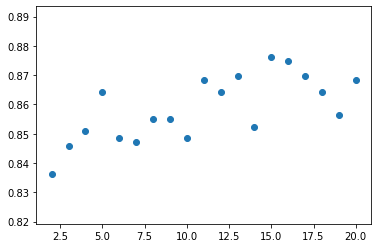

In [77]:
max_iter = int(1e4)
tasa = 0.1
N_neuronas = 2
v_N = []
eficiencia1 = []
while(N_neuronas <= 20): 
  mlp1 = MLPClassifier(hidden_layer_sizes=(N_neuronas,), activation='relu', max_iter=max_iter, alpha=1e-4, tol = 1e-4, verbose=False, learning_rate_init=tasa)
  mlp1.fit(x_entrenamiento, y_entrenamiento)
  v_N.append(N_neuronas)
  eficiencia1.append(mlp1.score(x_validacion, y_validacion))
  N_neuronas += 1
plt.scatter(v_N, eficiencia1)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


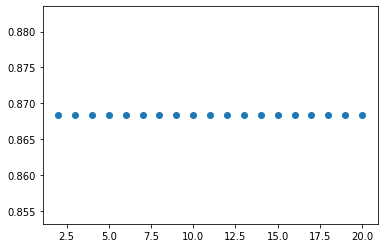

In [78]:
N_neuronas = 2
v_N = []
eficiencia2 = []
while(N_neuronas <= 20):
  mlp2 = MLPClassifier(hidden_layer_sizes=(N_neuronas,), activation='tanh', max_iter=max_iter, alpha=1e-4, tol = 1e-4, verbose=False, learning_rate_init=tasa)
  mlp2.fit(x_entrenamiento, y_entrenamiento)
  v_N.append(N_neuronas)
  eficiencia2.append(mlp1.score(x_validacion, y_validacion))
  N_neuronas += 1
plt.scatter(v_N, eficiencia2)
plt.show()

In [0]:
N_neuronas = 2
v_N = []
eficiencia3 = []
while(N_neuronas <= 20):
  mlp3 = MLPClassifier(hidden_layer_sizes=(N_neuronas,), activation='logistic', max_iter=max_iter, alpha=1e-4, tol = 1e-4, verbose=False, learning_rate_init=tasa)
  mlp3.fit(x_entrenamiento, y_entrenamiento)
  v_N.append(N_neuronas)
  eficiencia3.append(mlp1.score(x_validacion, y_validacion))
  N_neuronas += 1
plt.scatter(v_N, eficiencia3)
plt.show()

Luego de experiemtar para los tres tipos de activación se observo que:


1.   la activación por relu presenta un error empirico menor al de las activaciones sigmoidal y tanh.
2.   las constantes de aprendizaje iniciales que dieron un mejor resultado para la activación por relu fue la de 0.01

